## <p style="text-align: right;"> &#9989; Brendan Hunt</p>

# CMSE 202 Final (Section 001- Spring 2024)

The goal of this final is to give you the opportunity to test out some of the skills that you've developed having now finished CMSE 202. In particular, you'll be committing and pushing repository changes to a GitHub repository, working with data to build a network graph, performing regression analysis, and classifying data using a machine learning classifier. You should find that you have all of the skills necessary to complete this exam having completed the second half of CMSE 202!

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam. Once you've read through it, you'll probably want to make sure you do Part 1 first to ensure that your GitHub repository is working correctly. Let your instructor know right away if you run into issues!

The exam is set up so that even if you get stuck on one part there are opportunities to get points on the other parts, so consider jumping ahead if you feel like you aren't making progress and then come back later if you have time.

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. You can also use _your version_ of past CMSE 202 assignments and the CMSE 202 course materials as a resource! **However: The use of any person-to-person communication software or generative AI tools is absolutely not acceptable.** If you are seen accessing your email, using a collaborative cloud storage or document software (e.g. Slack, Google Documents), or generative AIs (e.g. ChatGPT), you will be at risk for receiving a zero on the exam.

**Keep your eyes on your screen!** Unfortunately, there isn't enough space in the room for everyone to sit at their own table so please do your best to keep your eyes on your own screen. This exam is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. If any of the instructors observe suspicious behavior, you will, again, risk receiving a zero. If you're completing the exam virtually, the same standards of academic integrity apply!

---
## Part 0: Academic integrity statement

Read the following statement and edit the markdown text to put your name in the statement. This is your commitment to doing your own authentic work on this exam.

> I, **BRENDAN HUNT**, affirm that this exam represents my own authetic work, without the use of any unpermitted aids or resources or person-to-person communication. I understand that this exam an an opportunity to showcase my own progress in developing and improving my computational skills and have done my best to demonstrate those skills.

---
## Part 1: Add to your Git repository to track your progress on your exam (2 points)

Before you get to far along in the exam, you're going to add it to the `cmse202-s24-turnin` repository you created in class so that you can track your progress on the exam and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s24-turnin` repository and create a new directory called `final`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" respository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s24-turnin`" repository inside the `final` directory that you just created. Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Question 1.1 (2 points)**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

``` bash
# Put the command for cloning your repository here!
git clone https://github.com/Brendanhhh/cmse202-s24-turnin
```

---
## Part 2: Generate a network graph from data (19 points)

In this part, we will create a network graph to represent the geographical adjacency relation between different countries. You can download the dataset from the following URL:

`https://raw.githubusercontent.com/yangy5/HWFiles/main/borders.csv`

&#9989; **Question 2.1 (3 points)**: To get started, **download the `.csv` file and place it in the same directory as your notebook**, then **read in the `borders.csv` dataset** as a Pandas data frame ,and finally **display the first 20 rows of the data**.

In [2]:
### Put your code here
import pandas as pd
df = pd.read_csv('borders.csv')
df.head(20)

,Country,Neighbor
0,Andorra,France
1,Andorra,Spain
2,United Arab Emirates,Oman
3,United Arab Emirates,Saudi Arabia
4,Afghanistan,China
5,Afghanistan,Iran (Islamic Republic of)
6,Afghanistan,Pakistan
7,Afghanistan,Tajikistan
8,Afghanistan,Turkmenistan
9,Afghanistan,Uzbekistan


You should see two columns: `Country` and `Neighbor`. These are the two (unique) country names that are adjacent. If `Neighbor` is `NaN`, the country has no neighbor.


&#9989; **Question 2.2 (2 points)**: How many countries have no neighbor?

In [3]:
### Put your code here
df_no_neighbor = df.loc[df['Neighbor'].isnull()]
#df_no_neighbor.to_csv('noneighbor.csv') for visualization to confirm all NaN values
df_no_neighbor.Country.unique()


array(['Antigua and Barbuda', 'Anguilla', 'Antarctica', 'American Samoa',
       'Australia', 'Aruba', 'Aland Islands', 'Barbados', 'Bahrain',
       'Saint Barthelemy', 'Bermuda', 'Bonaire, Sint Eustatius and Saba',
       'Bahamas', 'Bouvet Island', 'Cocos (Keeling) Islands',
       'Cook Islands', 'Cuba', 'Cabo Verde', 'Curacao',
       'Christmas Island', 'Cyprus', 'Dominica', 'Fiji',
       'Falkland Islands (Malvinas)', 'Micronesia (Federated States of)',
       'Faroe Islands', 'Grenada', 'Guernsey', 'Greenland', 'Guadeloupe',
       'South Georgia and the South Sandwich Islands', 'Guam',
       'Heard Island and McDonald Islands', 'Isle of Man',
       'British Indian Ocean Territory', 'Iceland', 'Jersey', 'Jamaica',
       'Japan', 'Kiribati', 'Comoros', 'Saint Kitts and Nevis',
       'Cayman Islands', 'Saint Lucia', 'Sri Lanka', 'Madagascar',
       'Marshall Islands', 'Northern Mariana Islands', 'Martinique',
       'Montserrat', 'Malta', 'Mauritius', 'Maldives', 'New Caled

&#9989; **Question 2.3 (1 points)**: Replace all the `NaN`s in the data frame by the number 0.

In [4]:
### Put your code here
df_clean = df.fillna(value=0)
#df_clean.to_csv('df_clean.csv')
df_clean.head(50)

,Country,Neighbor
0,Andorra,France
1,Andorra,Spain
2,United Arab Emirates,Oman
3,United Arab Emirates,Saudi Arabia
4,Afghanistan,China
5,Afghanistan,Iran (Islamic Republic of)
6,Afghanistan,Pakistan
7,Afghanistan,Tajikistan
8,Afghanistan,Turkmenistan
9,Afghanistan,Uzbekistan


&#9989; **Question 2.4 (5 points)**: **Create an undirected `networkx` graph** (you can call it `G`). Make sure it is an undirected graph. Then, iterate over the dataset and **add edges between the `Country` and `Neighbor` when the latter is not 0**. Finally, **draw the graph**.

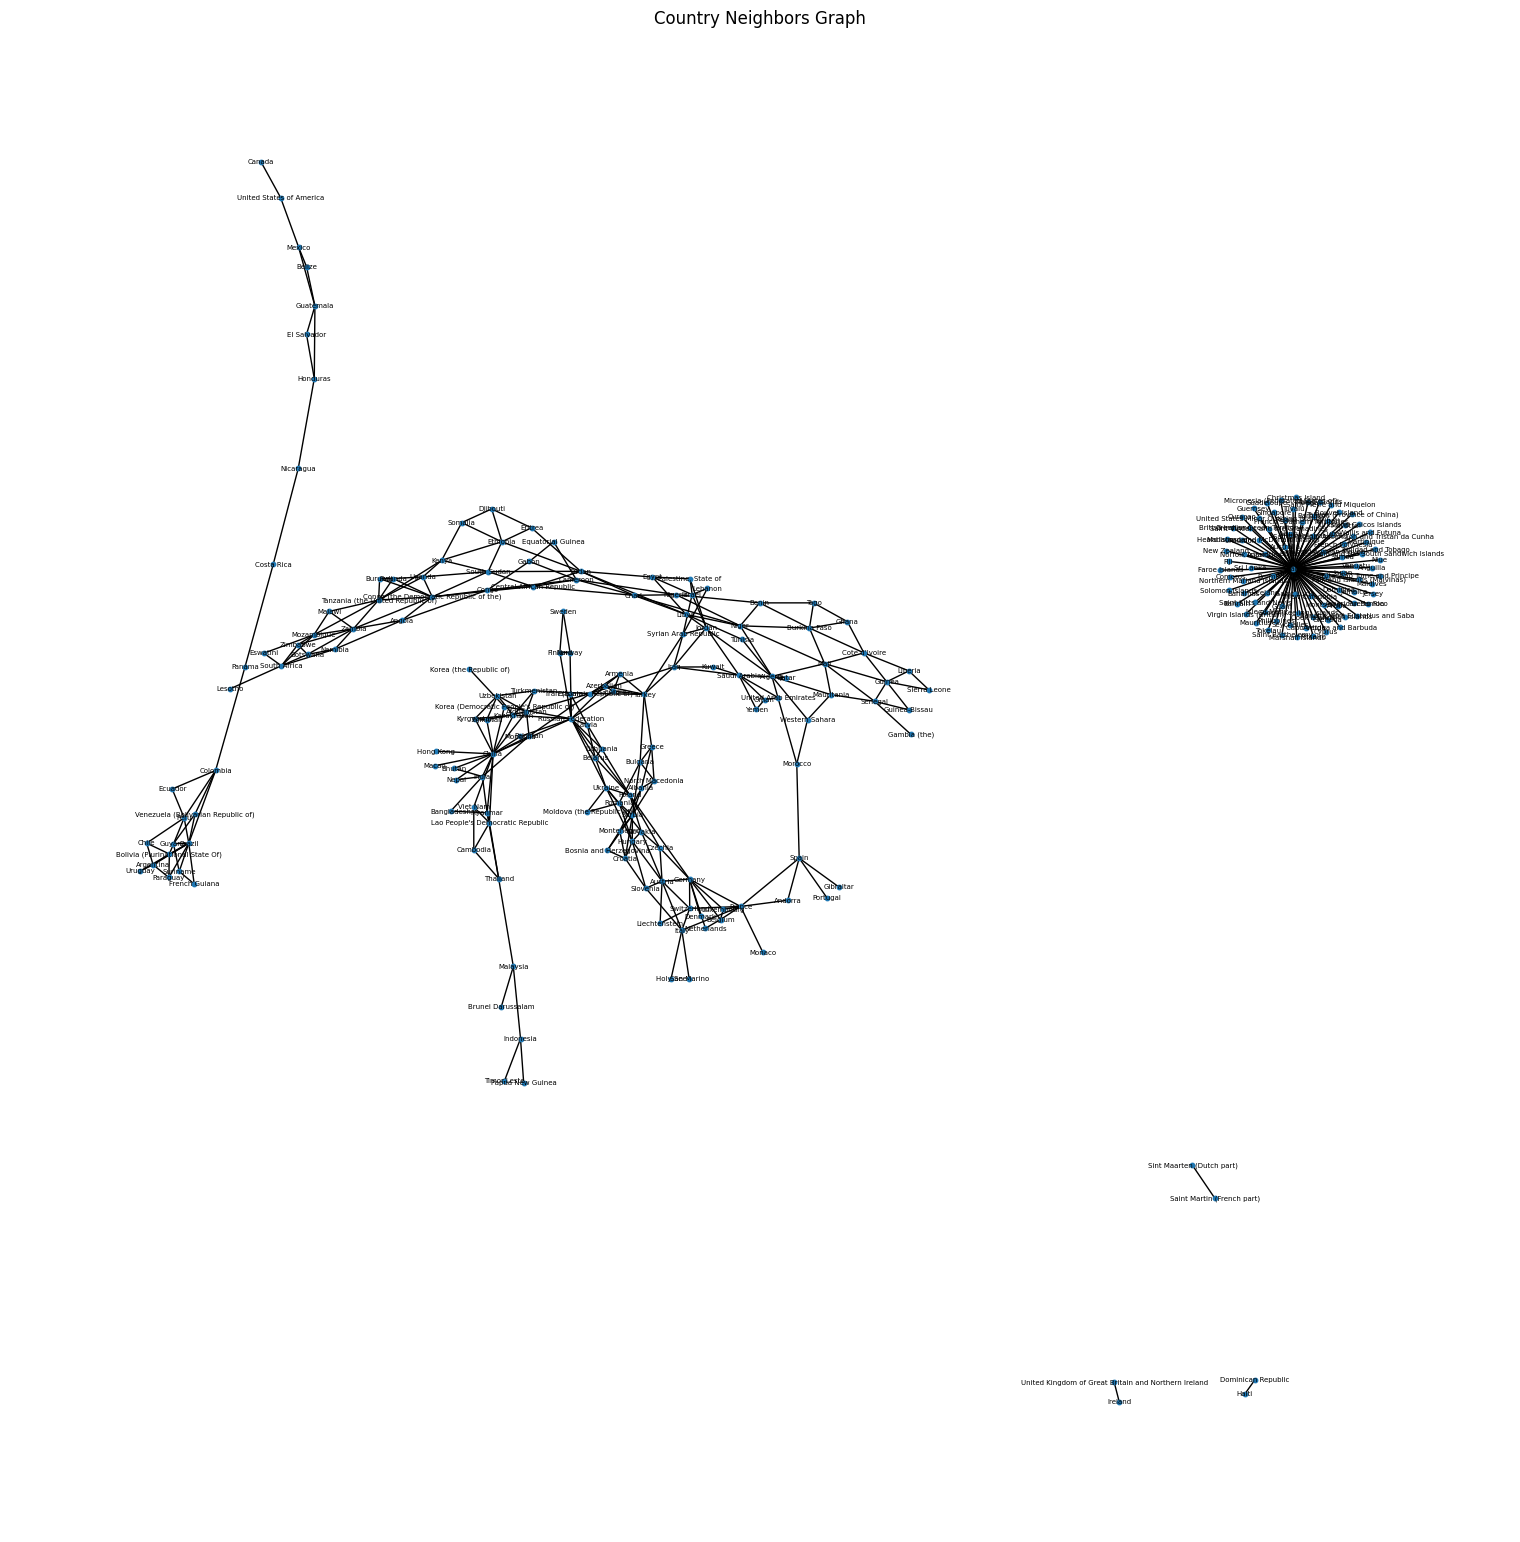

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for index, row in df.iterrows():
    if row['Neighbor'] != 0:  
        G.add_edge(row['Country'], row['Neighbor'])

plt.figure(figsize=(15,15)) 
nx.draw(G, with_labels=True,node_size=10, font_size=5)
plt.title('Country Neighbors Graph')
plt.show()


&#9989; **Question 2.5 (2 points)**: How many nodes and edges does the graph have in total?

In [6]:
### Put your code here
G.number_of_edges(),G.number_of_nodes()

(407, 250)

The number of edges attached to a node is said to be the _degree_ of the node. The `networkx` package has a method to compute degrees.

&#9989; **Question 2.6 (4 points)**: Using the relevant `networkx` method (consult the documentation/internet resources), **list the five countries that have the most neighbors**.

In [75]:
### Put your code here
degrees = nx.degree(G)
sorted_degrees = sorted(degrees(), key=lambda x: x[1], reverse=True)
top_5_nodes = [node for node, degree in sorted_degrees[:6]]  # made it 6 because i couldnt figure out how to remove the nan
top_5_nodes #top 5, china,russia,brazil,DRC,Germany


[nan,
 'China',
 'Russian Federation',
 'Brazil',
 'Congo (the Democratic Republic of the)',
 'Germany']

&#9989; **Question 2.7 (2 point)** Using the relevant `networkx` function (consult the documentation/internet resources), **find the "shortest path" between `"Portugal"` and `"Greece"`**. The two countries are not adjacent, but you should be able to determine a set of nodes to "traverse" to get from one country to the other. **Display the list of countries on this shortest path.**

In [8]:
### Put your code here
nx.astar_path(G,'Portugal','Greece')

['Portugal',
 'Spain',
 'France',
 'Switzerland',
 'Austria',
 'Hungary',
 'Romania',
 'Bulgaria',
 'Greece']

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**
m
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 2**", and push the changes to GitHub.

---

---
## Part 3: Perform a regression analysis on data (18 points)

The goal for this part is to do a multivariate linear regression, also known as multiple linear regression, to understand the relation between house price and other factors in Boston. You can download the dataset from this URL:

`https://raw.githubusercontent.com/yangy5/HWFiles/main/BostonHousePrice.csv`

&#9989; **Question 3.1 (3 points)**: To get started, **download the `.csv` file and place it in the same directory as your notebook**, then **read in the `BostonHousePrice.csv` dataset** and finally **display the first few rows of the data**. You can use `Pandas` for this task or any other Python tool you prefer.

In [17]:
### Put your code here
df = pd.read_csv('BostonHousePrice.csv')
df.head(50)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.524,5.631,100.0,6.0821,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.524,6.004,85.9,6.5921,386.71,17.10,18.9


You should see a list of students with several different information including:
* CRIM:     per capita crime rate by town
* ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS:    proportion of non-retail business acres per town
* NOX:      nitric oxides concentration (parts per 10 million)
* RM:       average number of rooms per dwelling
* AGE:      proportion of owner-occupied units built prior to 1940
* DIS:      weighted distances to five Boston employment centres
* B:        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT:    lower status of the population

You will be trying to predict `PRICE` using linear regression using the features.


&#9989; **Question 3.2 (3 points)**: **Construct two data frames** using the loaded data: one named `labels` and the other named `features`. The `labels` data frame should consist solely of the `PRICE` column, while the `features` data frame should contain all the other columns. **Display the first few lines of these data frames.**

In [28]:
### Put your code here
labels = df['PRICE']
features = df.loc[:, df.columns != 'PRICE']
labels.head(5),features.head(5)

(0    24.0
 1    21.6
 2    34.7
 3    33.4
 4    36.2
 Name: PRICE, dtype: float64,
       CRIM    ZN  INDUS    NOX     RM   AGE     DIS       B  LSTAT
 0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  396.90   4.98
 1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  396.90   9.14
 2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  392.83   4.03
 3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  394.63   2.94
 4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  396.90   5.33)

Next, we will fit the data using the ordinary least squares model `OLS` in `statsmodel`. 

&#9989; **Question 3.3 (2 point)**: Before proceeding, **add a column of constants** (set to 1.0) to the `features` data frame. You learned about a `statsmodels` function in class that can accomplish this task. Label the modified data frame as `features_const`. **Display** `features_const` to verify that the new column is indeed added.

In [32]:
### Put your code here
import statsmodels.api as sm
features_const = sm.add_constant(features)
features_const.head(20)

,const,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,396.90,5.33
5,1.0,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,394.12,5.21
6,1.0,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,395.60,12.43
7,1.0,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,396.90,19.15
8,1.0,0.21124,12.5,7.87,0.524,5.631,100.0,6.0821,386.63,29.93
9,1.0,0.17004,12.5,7.87,0.524,6.004,85.9,6.5921,386.71,17.10


Now you will perform the actual fit.

&#9989; **Question 3.4 (3 points)**: Using `statsmodels` `OLS`, **perform a fit** using `labels` (containing `PRICE`) as the dependent variable and `features_const` as the independent variable. **Print the fit** using `summary()`.

In [41]:
### Put your code here
model = sm.OLS(labels,features_const)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     125.5
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          8.16e-122
Time:                        11:29:37   Log-Likelihood:                -1539.9
No. Observations:                 506   AIC:                             3100.
Df Residuals:                     496   BIC:                             3142.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9642      4.295      2.320      0.021       1.525      18.404
CRIM          -0.1057      0.032     -3.339      0.001      -0.168      -0.044
ZN             0.0681      0.014      4.941      0.000       0.041       0.095
INDUS         -0.1329      0.057     -2.319      0.021      -0.245      -0.020
NOX           -8.2273      3.783     -2.175      0.030     -15.660      -0.795
RM             4.5462      0.441     10.314      0.000       3.680       5.412
AGE           -0.0065      0.014     -0.459      0.646      -0.034       0.021
DIS           -1.6552      0.214     -7.729      0.000      -2.076      -1.234
B              0.0094      0.003      3.303      0.001       0.004       0.015
LSTAT         -0.5526      0.055    -10.139      0.000      -0.660      -0.446
==============================================================================
Omnibus:                      164.676   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              616.409
Skew:                           1.456   Prob(JB):                    1.41e-134
Kurtosis:                       7.556   Cond. No.                     8.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

&#9989; **Question 3.5 (2 points)**: Among all the features, is there one that is significantly less important than others? justify your answer with a sentence or two.

<font size=+3>&#9998;</font> Age. Tne P>|t| value is much higher than the others

&#9989; **Question 3.6 (3 points)**: **Remove the "least important" feature**, then **fit the model again** and **print the fit** using `summary()` again.

In [46]:
### Put your code here
features_const = features_const[['const','CRIM','ZN','INDUS','NOX','RM','DIS','B','LSTAT']]
model = sm.OLS(labels,features_const)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     141.4
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          7.38e-123
Time:                        11:37:31   Log-Likelihood:                -1540.0
No. Observations:                 506   AIC:                             3098.
Df Residuals:                     497   BIC:                             3136.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0383      4.289      2.340      0.020       1.612      18.465
CRIM          -0.1053      0.032     -3.329      0.001      -0.167      -0.043
ZN             0.0690      0.014      5.069      0.000       0.042       0.096
INDUS         -0.1334      0.057     -2.331      0.020      -0.246      -0.021
NOX           -8.6681      3.656     -2.371      0.018     -15.852      -1.485
RM             4.5071      0.432     10.430      0.000       3.658       5.356
DIS           -1.6267      0.205     -7.944      0.000      -2.029      -1.224
B              0.0093      0.003      3.279      0.001       0.004       0.015
LSTAT         -0.5612      0.051    -10.965      0.000      -0.662      -0.461
==============================================================================
Omnibus:                      161.740   Durbin-Watson:                   0.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.437
Skew:                           1.436   Prob(JB):                    2.26e-129
Kurtosis:                       7.455   Cond. No.                     7.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

&#9989; **Question 3.7 (2 points)**: Discuss the difference in fit quality between the two fits. Did the second fit (with "least important" feature removed) outperform or underperform compared to the other? Describe how you evaluated the quality based on the fit statistics.

<font size=+3>&#9998;</font> Adjusted R2 is better slightly. I think it performed nearly the same.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", and push the changes to GitHub.

---

---
## Part 4: Perform a support vector machine (SVM) classification on data (19 points)

The goal of this part is to do a support vector machine classification. We will classify male and female penguins based on the four features: `Culmen Length (mm)`, `Culmen Depth (mm)`, `Flipper Length (mm)`, `Body Mass (g)`. We will also perform a train-test split on the data first. You can download the dataset here:

`https://raw.githubusercontent.com/yangy5/HWFiles/main/penguin.csv`

&#9989; **Question 4.1 (3 point)**: **download the `.csv` file** and place it in the same directory as your notebook**, then **read in the `penguins.csv` dataset** and finally **display the first few rows of the data**.

In [47]:
### Put your code here
df = pd.read_csv('penguin.csv')
df.head(20)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,39.1,18.7,181,3750,MALE
1,39.5,17.4,186,3800,FEMALE
2,40.3,18.0,195,3250,FEMALE
3,37.6,18.5,188,3500,MALE
4,36.7,19.3,193,3450,FEMALE
5,39.3,20.6,190,3650,MALE
6,38.9,17.8,181,3625,FEMALE
7,39.2,19.6,195,4675,MALE
8,34.1,18.1,193,3475,FEMALE
9,42.0,20.2,190,4250,FEMALE


&#9989; **Question 4.2 (4 points)**: **Create two data structures** (e.g. dataframes) from your table: one called `labels` containing _only_ `Sex` and one called `features` containing _only_ `Culmen Length (mm)`, `Culmen Depth (mm)`, `Flipper Length (mm)`, and `Body Mass (g)`.

Then, **perform a train-test-split** using functions we used in class. Use a `train_size` of `0.75` and `random_state` of `517`. You should now have a training and a testing set with "labels" and "features" each.

**Syntax Note:** if you are using Pandas data frames for creating and storing your `labels` variable, you will need to make sure to use `['Sex']` for the single-column selection, not `[['Sex']]` as the latter will create a list of single-entry lists that the classification code you are going to use later will not like! 

In [69]:
### Put your code here
from sklearn.model_selection import train_test_split
labels = df['Sex']
features = df[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.75, random_state=517)

&#9989; **Question 4.3 (6 points)**: **Train an SVM classifier** using the `sklearn` `SVC` class on the dataset. Apply a `linear` kernel and set the hyperparameter `C=0.1`. **Fit the classifier** using the training set and then use the trained model to **predict labels** for the testing set. Finally, **display the fit statistics** using `confusion_matrix` and `classification_report`. 

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
model = SVC(kernel='linear', C=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(conf_mat)
print(class_report)


[[52  7]
 [12 43]]
              precision    recall  f1-score   support

      FEMALE       0.81      0.88      0.85        59
        MALE       0.86      0.78      0.82        55

    accuracy                           0.83       114
   macro avg       0.84      0.83      0.83       114
weighted avg       0.84      0.83      0.83       114



&#9989; **Question 4.4 (3 points)**: Analyze the results from your classification report and confusion matrix by addressing these three questions (provide at least one or two sentences for each response for full credit):

* Describe your observations from the confusion matrix.
* Would you evaluate this classifier as effective or ineffective?
* Which metric from the classification report informed your decision?

<font size=+3>&#9998;</font> 52 TP, 7 FP, 12 FN, 43 TN. It is 83% accurate according to the confusion matrix after doing some math.  
It depends on the level of precision needed here. I would call 83% accurate for the first iteration of the model to be pretty effective, but it could probably be tuned.  
The accuracy metric is what informed my decision

&#9989; **Question 4.5 (3 points)**: We've been using machine learning terminology throughout the course. Please define the following concepts in a few sentences each:

* What do "labels" and "features" mean?
* Why are "training sets" and "testing sets" important?

<font size=+3>&#9998;</font> labels are what the thing actually is. Features are the physical characteristics of that thing. We split them apart to see if we can correctly identify one or the other based off of the features given.  
  
Training and testing sets are important because the training set teaches the model. The testing set gives it new data to see if it can correctly identify.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 4**", and push the changes to GitHub.

---

## You're done! Congrats on finishing your CMSE 202 Final!

Make sure all of your changes to your repository are committed and pushed to GitHub. Also upload a copy of this notebook to the dropbox on D2L in case something went wrong with your repository or if you couldn't get the repository to work.